## Scales and Transformation

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

pokemon = pd.read_csv('data/pokemon.csv')

Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values.

Text(0.5,0,'log(values)')

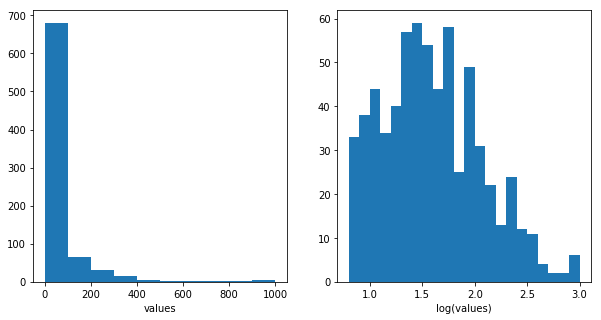

In [22]:
plt.figure(figsize = [10, 5])

# left histogram: data plotted in natural units
plt.subplot(1,2,1)
bin_edges = np.arange(0, pokemon['weight'].max()+100, 100)
plt.hist(data = pokemon, x = 'weight', bins = bin_edges)
plt.xlabel('values')

# right histogram: data plotted adter direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(pokemon['weight']) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(values)')

In the plot on the left, the few data points with value above 1000 mash the majority of the points into the bins on the far left. With the plot on the right, the logarithmic transform makes those large points look in line with the rest: a raw value of 1000 becomes a value of 3 under log transform, and a raw value of 100 becomes a log-transformed value of 2

This is where scale transformations are handy. In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret data in the variable's natural units.

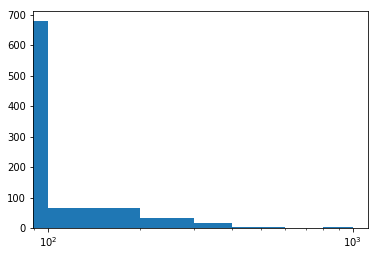

In [24]:
bin_edges = np.arange(0, pokemon['weight'].max() + 100, 100)
plt.hist(pokemon['weight'], bins = bin_edges)
plt.xscale('log')

Notice two things about the plot now. Even though the data is on a log scale, the bins are still linearly spaced. This means that they change size from wide on the left to thin on the right, as the values increase multiplicatively. Secondly, the default label settings are still somewhat tricky to interpret, and are sparse as well.

To address the bin size issue, we just need to change them so that they are evenly-spaced powers of 10.

([<matplotlib.axis.XTick at 0x1a22b517b8>,
 <a list of 6 Text xticklabel objects>)

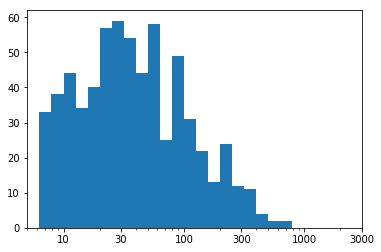

In [25]:
bin_edges = 10 ** np.arange(0.8, np.log10(pokemon['weight'].max()+0.1), 0.1)
plt.hist(pokemon['weight'], bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs)

the transformation implies that additive steps on the log scale will result in multiplicative changes in the natural scale, an important implication when it comes to data modeling. 

([<matplotlib.axis.XTick at 0x1a235e0ac8>,
 <a list of 5 Text xticklabel objects>)

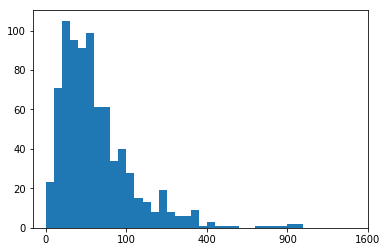

In [26]:
def sqrt_trans(x, inverse = False):
    """ transformatio helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2
    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int))
